In [102]:
from Skipass.utils.df_typing import mf_date_conv_filtered
from Skipass.station_filter.station_filter import station_filter_nivo,station_filter_synop, station_mapping 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
path_to_nivo = '../raw_data/weather_nivo_data.csv'
path_to_synop = '../raw_data/weather_synop_data.csv'
year = 2018


In [103]:
stations_nivo = station_filter_nivo()
stations_synop = station_filter_synop()[stations_nivo.columns]
stations_synop = stations_synop[stations_nivo.columns]
stations = pd.concat([stations_nivo,stations_synop])
station_mapping(stations)

In [104]:
df_nivo = pd.read_csv(path_to_nivo)
df_synop = pd.read_csv(path_to_synop)

/home/romain/.pyenv/versions/3.8.6/envs/skipass/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (1,2,3,26) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/romain/.pyenv/versions/3.8.6/envs/skipass/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [105]:
stations.ID = stations.ID.astype(int)

In [107]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73 entries, 1 to 30
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Latitude   73 non-null     float64
 1   Longitude  73 non-null     float64
 2   ID         73 non-null     int64  
 3   Altitude   73 non-null     int64  
 4   Nom        73 non-null     object 
dtypes: float64(2), int64(2), object(1)
memory usage: 3.4+ KB


In [108]:
df_nivo = df_nivo[df_nivo.numer_sta != 'numer_sta']
df_nivo.numer_sta = df_nivo.numer_sta.astype(int)

In [109]:
df_nivo['numer_sta'].isin(stations.ID)

0          True
1          True
2          True
3         False
4         False
          ...  
245661     True
245662    False
245663     True
245664    False
245665     True
Name: numer_sta, Length: 245665, dtype: bool

In [110]:
df_nivo = df_nivo[df_nivo.numer_sta.isin(stations.ID)]
df_synop = df_synop[df_synop.numer_sta.isin(stations.ID)]

In [111]:
df_nivo_year = mf_date_conv_filtered(df_nivo,year)
df_synop_year = mf_date_conv_filtered(df_synop,year)

<AxesSubplot:title={'center':'Synop data 2018 - 1 stations'}, xlabel='date', ylabel='Count'>

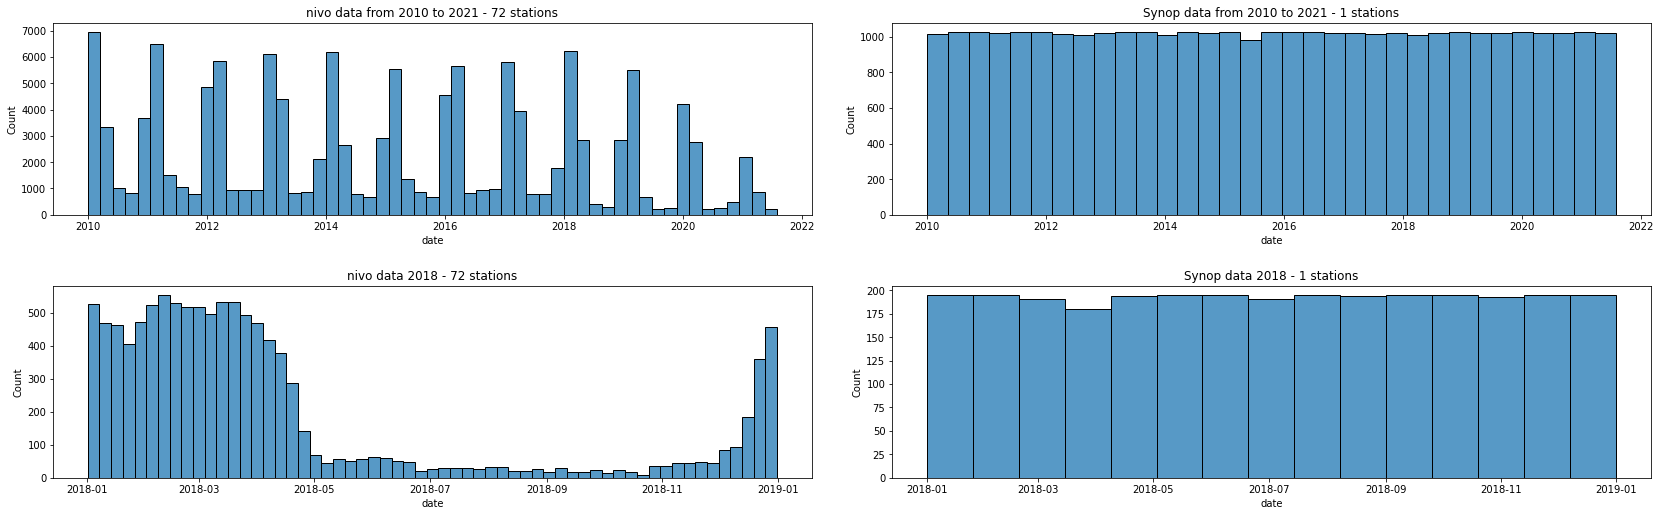

In [112]:
fig, axs2 = plt.subplots(2,2, figsize=(24,8))
fig.tight_layout(pad=5.0)
axs2[0,0].set_title('nivo data from 2010 to 2021 - 72 stations')
sns.histplot(data=df_nivo.date, ax=axs2[0,0])
axs2[1,0].set_title('nivo data 2018 - 72 stations')
sns.histplot(data=df_nivo_year.date, ax=axs2[1,0])
axs2[0,1].set_title('Synop data from 2010 to 2021 - 1 stations')
sns.histplot(data=df_synop.date, ax=axs2[0,1])
axs2[1,1].set_title('Synop data 2018 - 1 stations')
sns.histplot(data=df_synop_year.date, ax=axs2[1,1])

In [129]:
nivo_top10 = df_nivo.groupby('numer_sta',as_index=False).count().nlargest(10,'t')[['numer_sta','t','td']]
nivo_top10 = nivo_top10.rename(columns={'numer_sta':'ID'})

In [130]:
nivo_top10 = nivo_top10.merge(stations,how='left',on='ID').drop(columns=('td')).rename(columns={'t':'line_count'})

In [131]:
nivo_top10

,ID,line_count,Latitude,Longitude,Altitude,Nom
0,7590,6537,44.810000,6.195333,1270,Les Portes en Valgaudemar
1,7931,5812,44.671167,6.776167,1665,CEILLAC_NIVO
2,7457,5113,46.315333,6.673333,790,VACHERESSE AUXI
3,7893,4379,45.413333,6.632167,1780,Courchevel
4,7876,4264,45.972000,6.454167,1270,Le Grand Bornand
5,7589,3464,44.946667,6.188333,1570,St Christophe
6,7933,3428,44.593000,6.843333,1908,Maljasset
7,7498,3139,45.445000,6.978167,1854,Val d Isere Joseray
8,7904,3056,45.468333,6.908333,2080,Tignes
9,7895,3045,45.506833,6.678667,1980,La Plagne


In [132]:
station_mapping(nivo_top10)